In [1]:
import pandas as pd
videoGamesSales = pd.read_csv('Datasets/vgsales.csv', sep= ',')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
videoGamesSales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [4]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [8]:
before = len(videoGamesSales["NA_Sales"])
after = len(videoGamesSales["NA_Sales"].dropna())

print(before)
print(after)
print("er zijn dus geen lege waardes!")

16598
16598
er zijn dus geen lege waardes!


### Test/train split


In [6]:
videoGamesSales_train, videoGamesSales_test = train_test_split(videoGamesSales, test_size=0.3, stratify=videoGamesSales['Genre'], random_state=42)
print(videoGamesSales_train.shape, videoGamesSales_test.shape)

(11618, 11) (4980, 11)


### Trainset

In [20]:
features= ['Global_Sales']
dt = DecisionTreeClassifier(max_depth = 3) # Increase max_depth to see effect in the plot
dt.fit(videoGamesSales_train[features].fillna(videoGamesSales_train.mean()), videoGamesSales_train['Genre'])

DecisionTreeClassifier(max_depth=3)

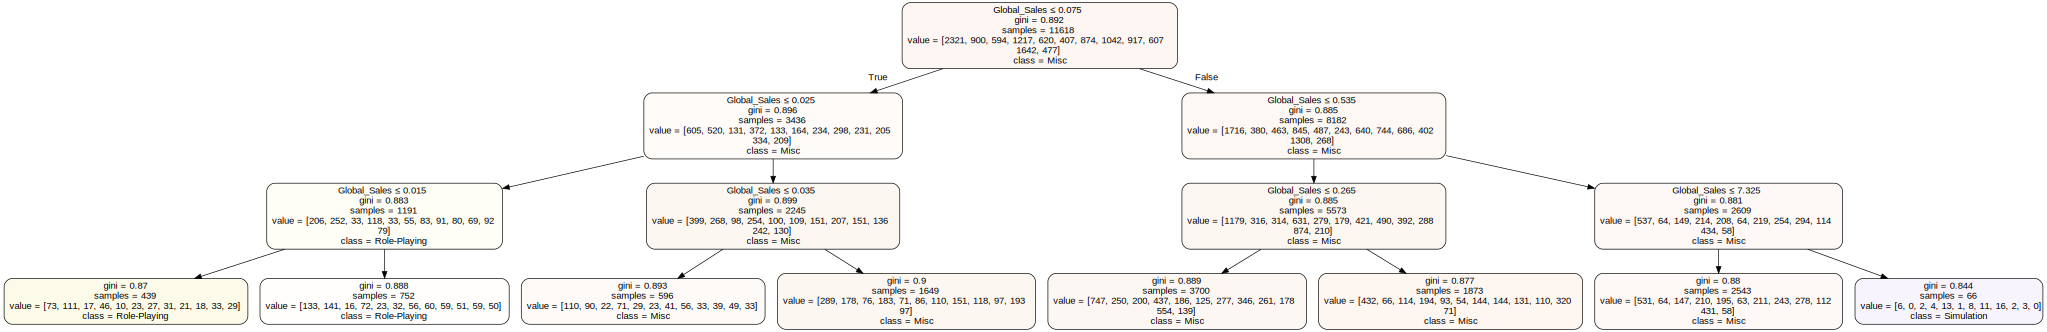

In [21]:
plot_tree_classification(dt, features, videoGamesSales_train.Genre.unique())

In [24]:
predictionsOnTrainset = dt.predict(videoGamesSales_train[features].fillna(videoGamesSales_train.mean()))
calculate_accuracy(predictionsOnTrainset, videoGamesSales_train.Genre)

accuracyTrain = calculate_accuracy(predictionsOnTrainset, videoGamesSales_train.Genre)
print("Accuracy on training set " + str(accuracyTrain))

Accuracy on training set 0.20459631606128423


### Testset

In [25]:
dt.fit(videoGamesSales_test[features].fillna(videoGamesSales_test.mean()), videoGamesSales_test['Genre'])

DecisionTreeClassifier(max_depth=3)

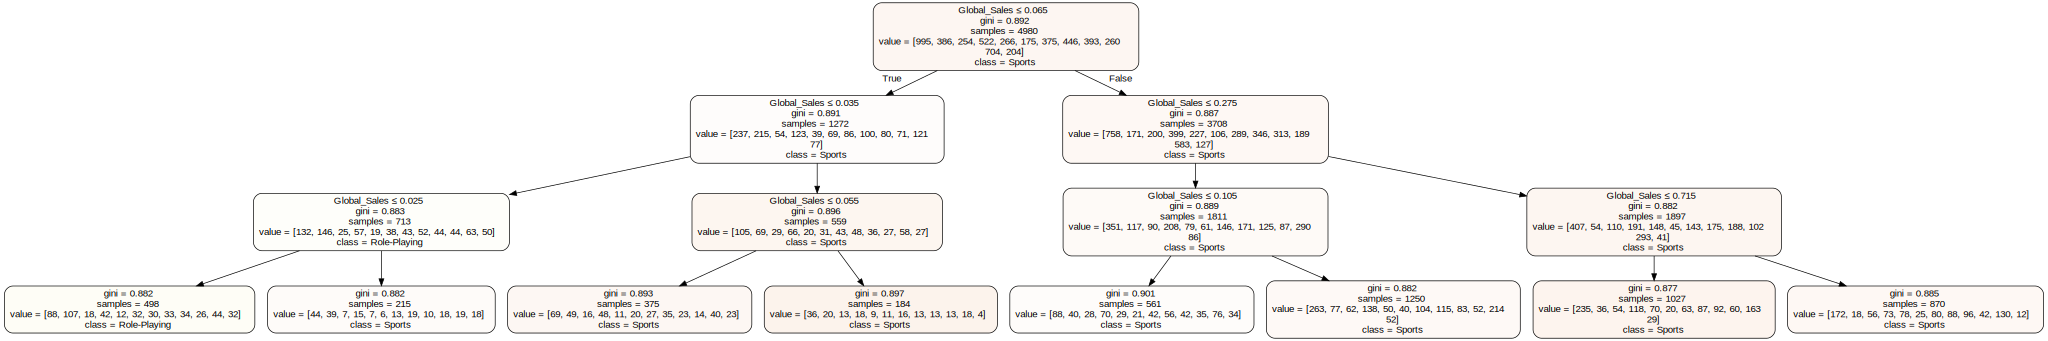

In [26]:
plot_tree_classification(dt, features, videoGamesSales_test.Genre.unique())

In [27]:
predictionsOnTestset = dt.predict(videoGamesSales_test[features].fillna(videoGamesSales_test.mean()))
calculate_accuracy(predictionsOnTestset, videoGamesSales_test.Genre)

accuracyTest = calculate_accuracy(predictionsOnTestset, videoGamesSales_test.Genre)
print("Accuracy on testing set " + str(accuracyTest))

Accuracy on testing set 0.2036144578313253


### Difference Test/Train

Zoals er is te zien is er komt de Tesing en Training bijna overeen met elkaar. alhoewel dat vaak geod is, kan je voor deze dataset niet zoveel zeggen. het heeft maar een accurracy van 0.20 en als je een beetje logisch nadenkt kan het aantal sales niet zoveel zeggen over de genre omdat, het eigenlijk niet zoveel met elkaar te maken heeft. dat is ook te zien in de vorrige opdrachten.